In [1]:
import os
os.chdir('../')

In [2]:
from models.pose import DenseNet

In [3]:
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import models
from torchvision import transforms
from torchvision.transforms import ToTensor

In [4]:
from densepose import add_densepose_config

from detectron2.structures.instances import Instances
from detectron2.structures.boxes import Boxes

In [5]:
height = 256
width = 256

In [6]:
transform = transforms.Compose([
                    transforms.Resize((height, width)),
                    transforms.ToTensor(),
                ])

In [7]:
img_path = './imgs/MEN-Denim-id_00000080-01_7_additional.jpeg'

img = Image.open(img_path).convert('RGB')
img = transform(img).unsqueeze(0)


In [8]:
img.shape

torch.Size([1, 3, 256, 256])

In [9]:
# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [10]:
model_dp = DenseNet('./models/model_configs/densepose_rcnn_R_50_FPN_s1x.yaml').to(device)

In [11]:
def set_instances(box, bs):
    box = Boxes(box)
    instances = [{'pred_classes': torch.tensor([0], device=box.device), 'pred_boxes': box} for _ in range(bs)]
    instances = [Instances(image_size=(height, width), **x) for x in instances]
    return instances

bs = 1#img.size(0)
box = torch.tensor([[0, 0, height, width]], device=img.device)
instances = set_instances(box, bs)

In [12]:
pose = model_dp.forward(img.to(device), instances)
pose = pose.squeeze(0).permute((1,2,0)).detach().cpu()
res = np.zeros(pose.shape)
for i in range(pose.shape[2]):
  res[:,:,i] = pose[:, :, i] * (i+1)

res = np.sum(res,axis=2)
print(res.shape)

(112, 112)


Text(0.5, 1.0, 'densepose output')

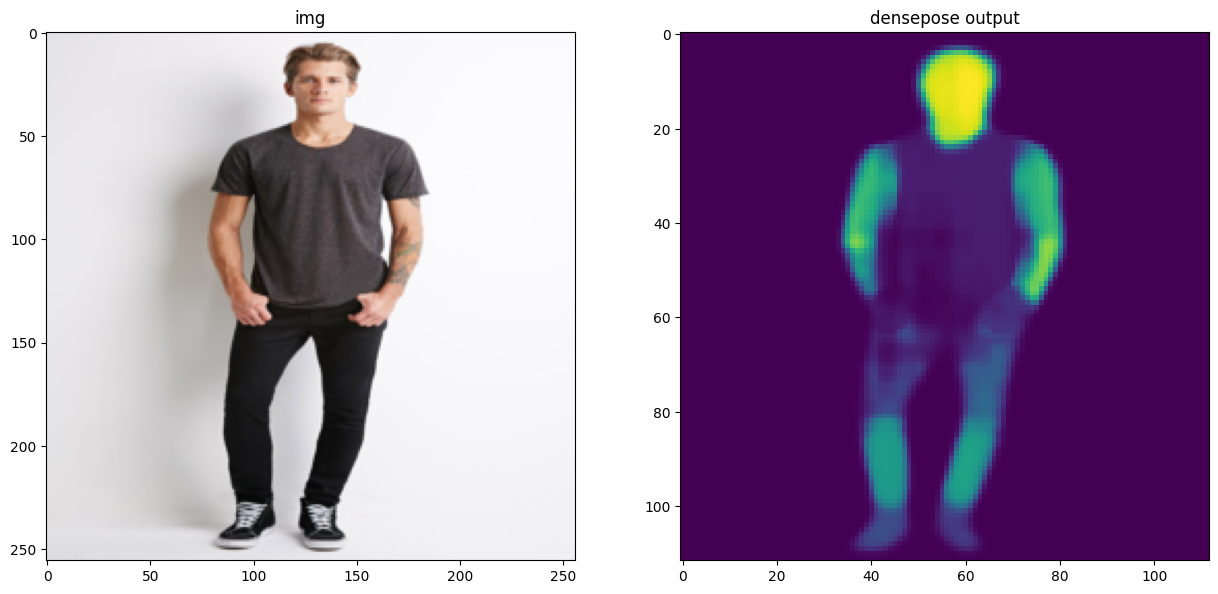

In [15]:
#Sample display
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

# Display the LR and HR images using matplotlib
axs[0].imshow(img.squeeze(0).permute((1,2,0)))
axs[0].set_title('img') 
axs[1].imshow(res)
axs[1].set_title('densepose output')


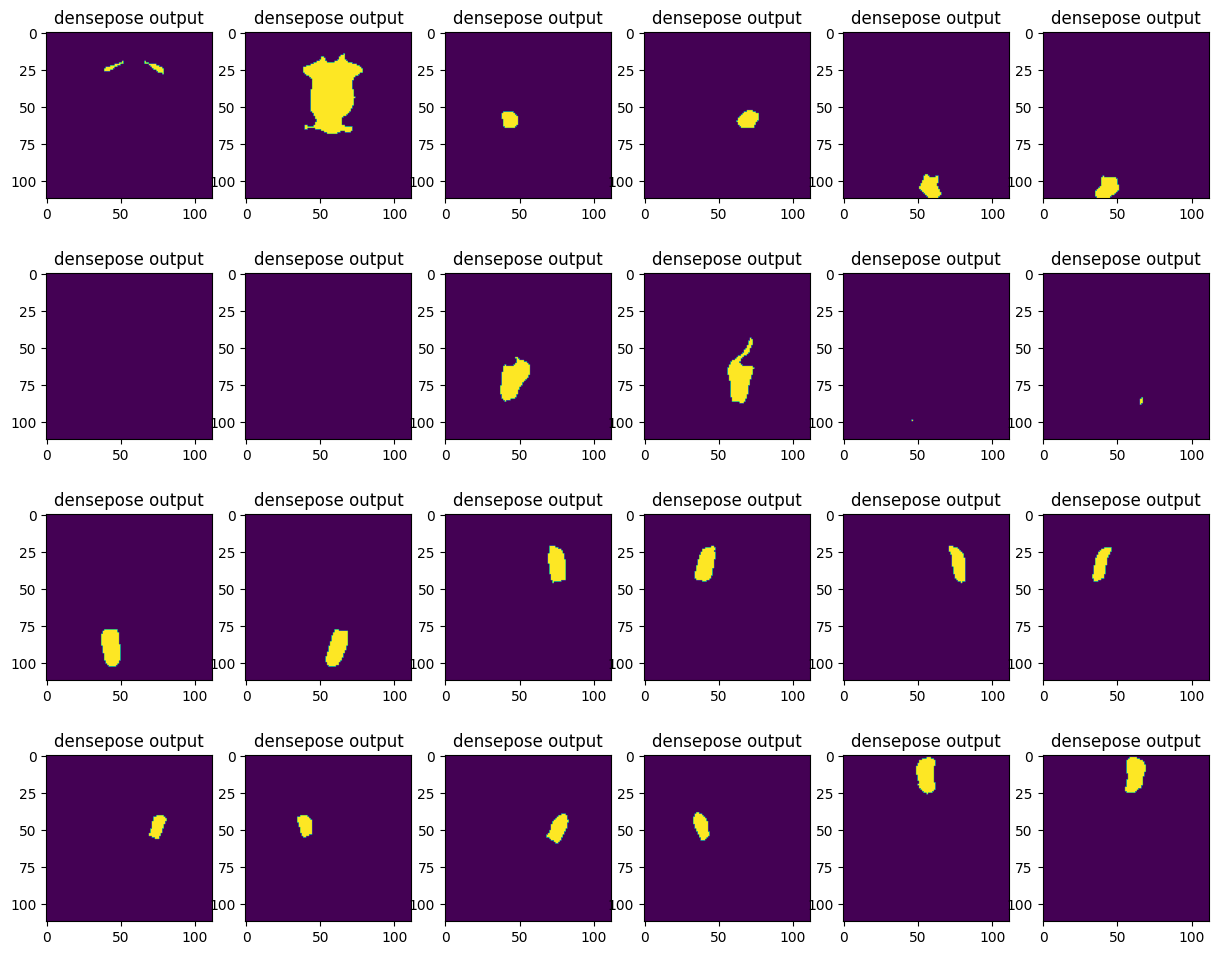

In [27]:
#Sample display
fig, axs = plt.subplots(4, 6, figsize=(15, 12))

# Display the LR and HR images using matplotlib
for i in range(24):
    indi = i//6
    indj = i%6
    axs[indi][indj].imshow(pose[:,:,i]>0.01)
    axs[indi][indj].set_title('densepose output')


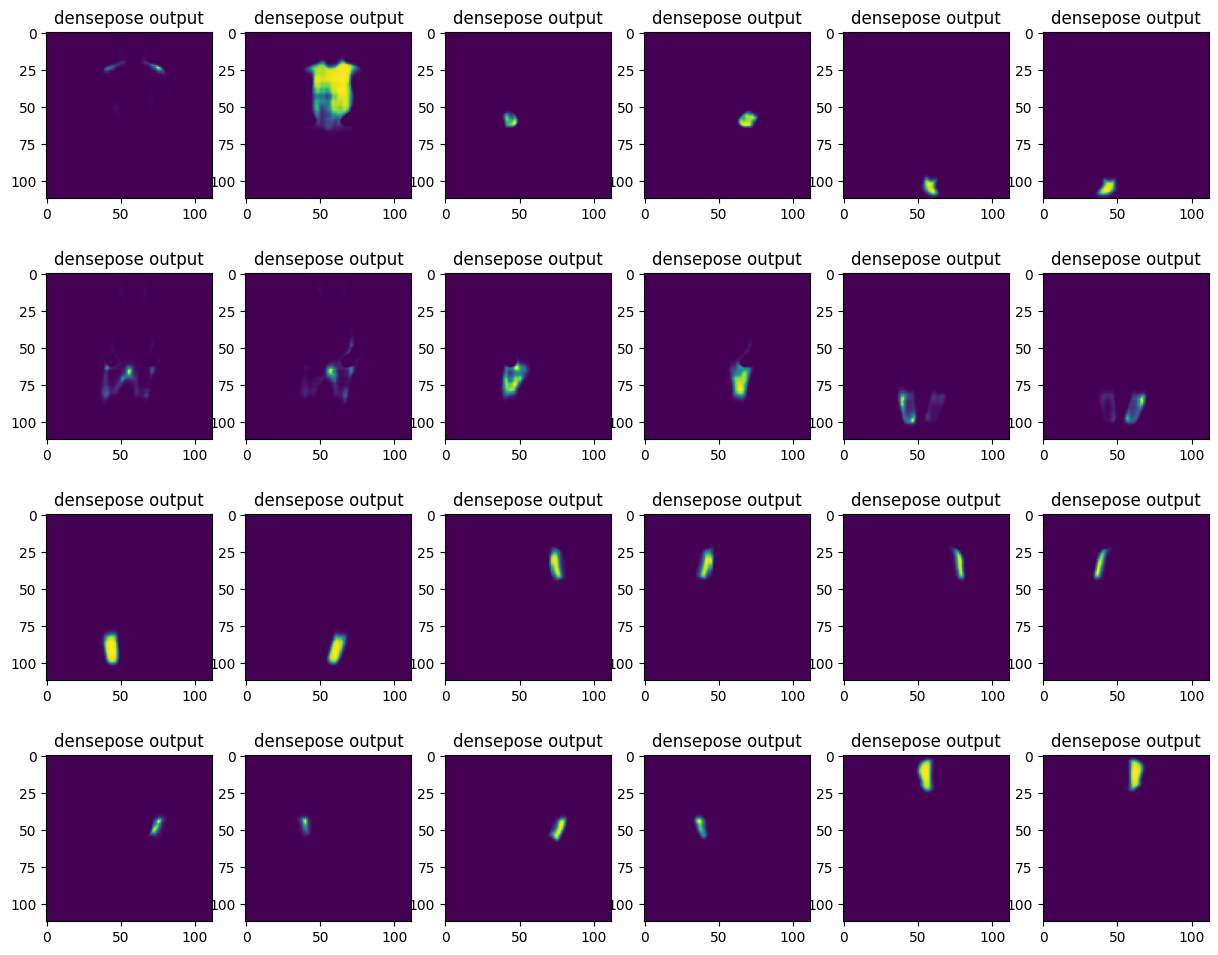

In [28]:
#Sample display
fig, axs = plt.subplots(4, 6, figsize=(15, 12))

# Display the LR and HR images using matplotlib
for i in range(24):
    indi = i//6
    indj = i%6
    axs[indi][indj].imshow(pose[:,:,i])
    axs[indi][indj].set_title('densepose output')


In [23]:
a = pose[:,:,i]

print(a.min())
print(a.max())

tensor(8.9832e-13)
tensor(0.9808)
